In [66]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.plotting import table

In [120]:
###Reading in the dataframe and subsetting by columns that we actually need
songDf = pd.read_csv("songData.csv")
featureDf = songDf[['acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness','liveness','loudness', 
        'speechiness', 'tempo', 'time_signature','valence', 'popularity']]

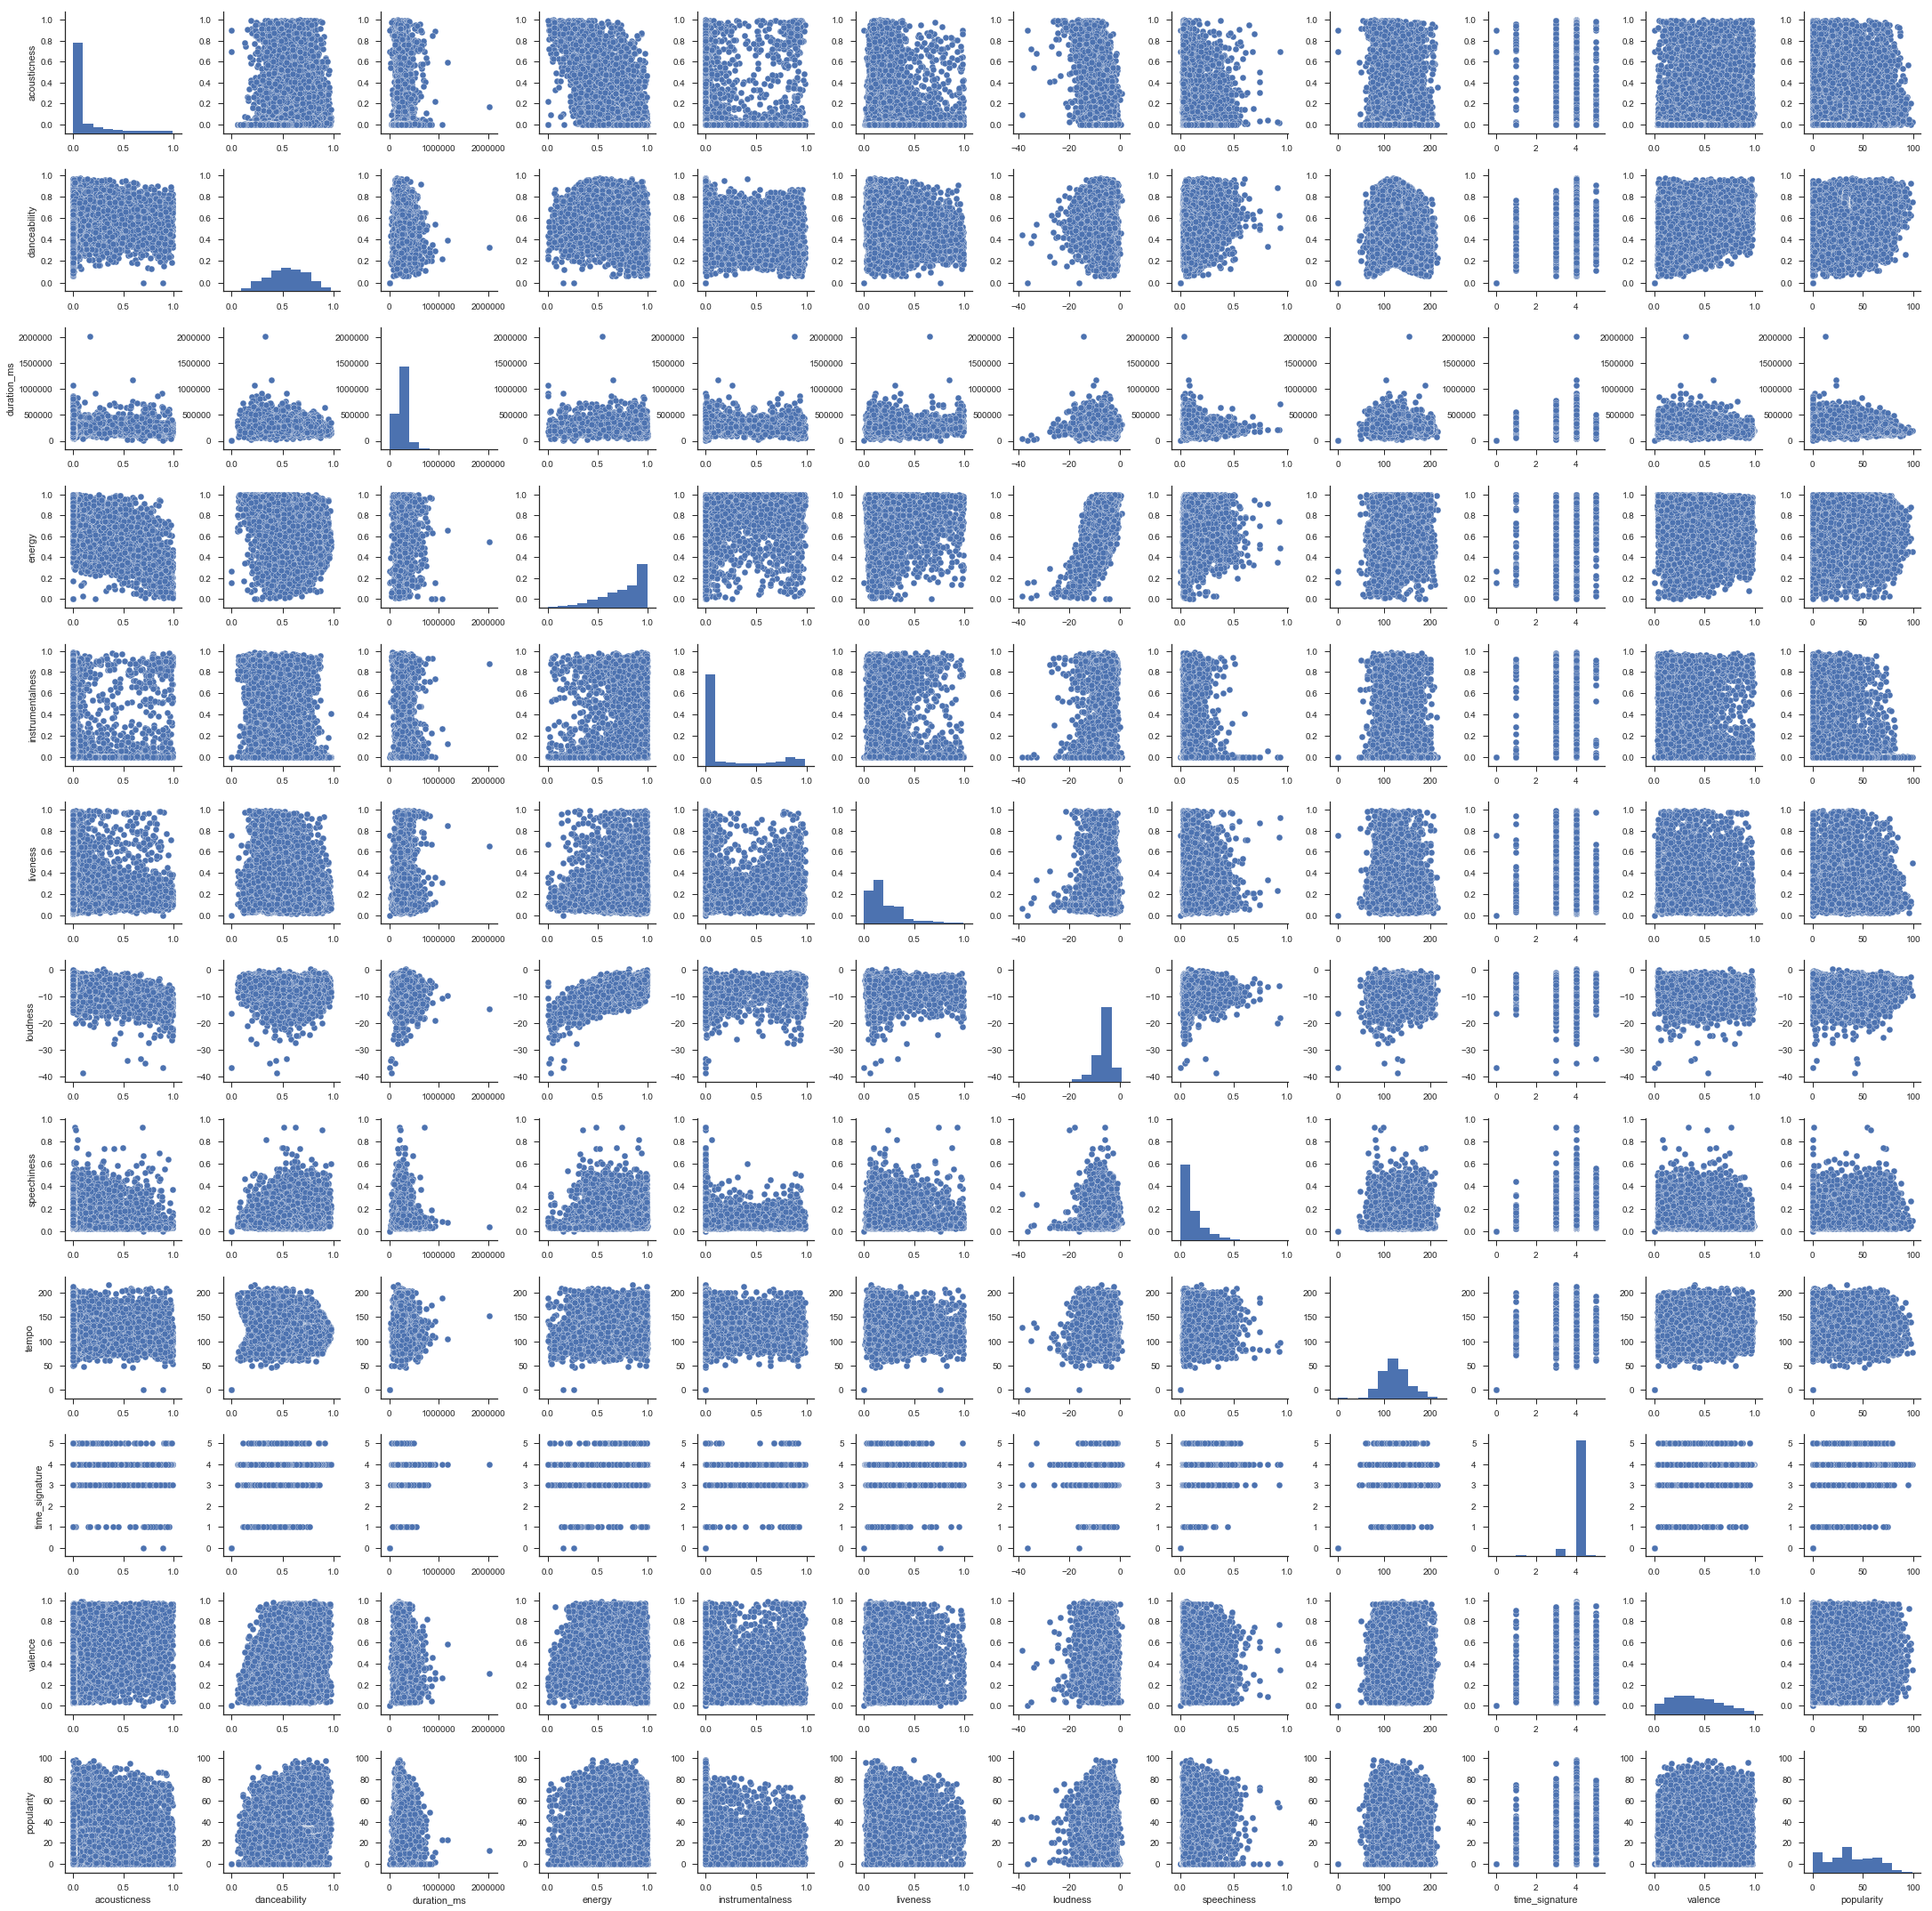

In [121]:
###Create scatterplots for each variable

sb.set(style="ticks")
plt.show(sb.pairplot(featureDf))

In [61]:
###Correlation Matrix 
featureDf.corr()

acousticness  danceability  duration_ms    energy  \
acousticness          1.000000      0.153938    -0.113950 -0.671243   
danceability          0.153938      1.000000    -0.100419 -0.411816   
duration_ms          -0.113950     -0.100419     1.000000  0.064524   
energy               -0.671243     -0.411816     0.064524  1.000000   
instrumentalness     -0.117271     -0.228568     0.292004  0.191424   
liveness             -0.059582     -0.128548     0.067157  0.127998   
loudness             -0.561398     -0.158433    -0.073700  0.724839   
speechiness          -0.044257      0.129592    -0.079108  0.020756   
tempo                -0.095143     -0.138545    -0.016909  0.127278   
time_signature       -0.085379      0.167843    -0.024662  0.041401   
valence               0.233581      0.352839    -0.250072 -0.142194   
popularity           -0.017343      0.263049    -0.106260 -0.110762   

                  instrumentalness  liveness  loudness  speechiness     tempo  \
acousticness             -0.117271 -0.059582 -0.561398    -0.044257 -0.095143   
danceability             -0.228568 -0.128548 -0.158433     0.129592 -0.138545   
duration_ms               0.292004  0.067157 -0.073700    -0.079108 -0.016909   
energy                    0.191424  0.127998  0.724839     0.020756  0.127278   
instrumentalness          1.000000  0.022571 -0.061662    -0.121114  0.000196   
liveness                  0.022571  1.000000  0.044512     0.064301  0.011211   
loudness                 -0.061662  0.044512  1.000000     0.074905  0.093186   
speechiness              -0.121114  0.064301  0.074905     1.000000  0.059887   
tempo                     0.000196  0.011211  0.093186     0.059887  1.000000   
time_signature           -0.071570 -0.013946  0.072010     0.046060 -0.018868   
valence                  -0.268229 -0.048294 -0.100487    -0.062262  0.028474   
popularity               -0.285635 -0.071270  0.061171     0.022204 -0.028297   

                  time_signature   valence  popularity  
acousticness           -0.085379  0.233581   -0.017343  
danceability            0.167843  0.352839    0.263049  
duration_ms            -0.024662 -0.250072   -0.106260  
energy                  0.041401 -0.142194   -0.110762  
instrumentalness       -0.071570 -0.268229   -0.285635  
liveness               -0.013946 -0.048294   -0.071270  
loudness                0.072010 -0.100487    0.061171  
speechiness             0.046060 -0.062262    0.022204  
tempo                  -0.018868  0.028474   -0.028297  
time_signature          1.000000  0.092535    0.104455  
valence                 0.092535  1.000000    0.166784  
popularity              0.104455  0.166784    1.000000

In [47]:
###Doing Correlation Matrix by Genre
correlationDfList = []
for genre in ['rap','rock','pop','metal','jazz','blues','electric','country']:
    genreDf = songDf[songDf.genre == genre]
    featureDf = genreDf[['acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness','liveness','loudness', 
        'speechiness', 'tempo', 'time_signature','valence', 'popularity']]
    correlationDfList.append(featureDf.corr())

In [131]:
def createCorrelationHeatMap(correlations):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = ['acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness','liveness','loudness', 
        'speechiness', 'tempo', 'time_signature','valence', 'popularity']
    ax.set_xticks(np.arange(len(ticks)), ticks)
    ax.set_yticks(np.arange(len(ticks)), ticks)
    plt.show()

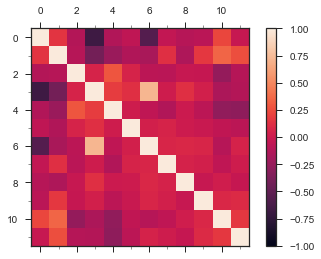

In [132]:
createCorrelationHeatMap(featureDf.corr())

In [118]:
def heatScatterPlot(xlabel, ylabel):
    x = featureDf[xlabel]
    y = featureDf[ylabel]

    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()

    axs = plt.subplots(ncols=1, sharey=True, figsize=(10, 6))


    ax = axs[1]
    hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='viridis')
    ax.axis([xmin, xmax, ymin, ymax])
    ax.set_xlabel = xlabel
    ax.set_ylabel = ylabel
    ax.set_title("Scatter Plot of " + ylabel + " vs " + xlabel)
    cb = fig.colorbar(hb, ax=ax)
    cb.set_label('log10(N)')
    plt.savefig('scatterPlot'+xlabel+'.png')
    plt.show()

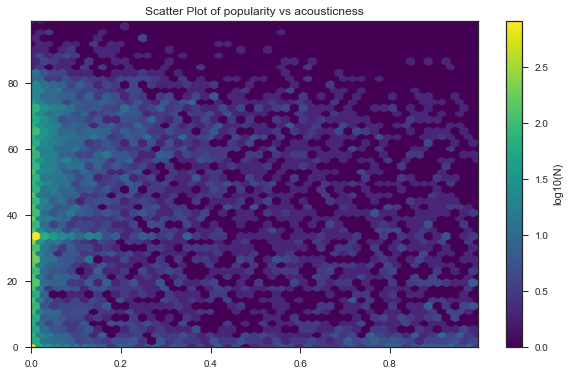

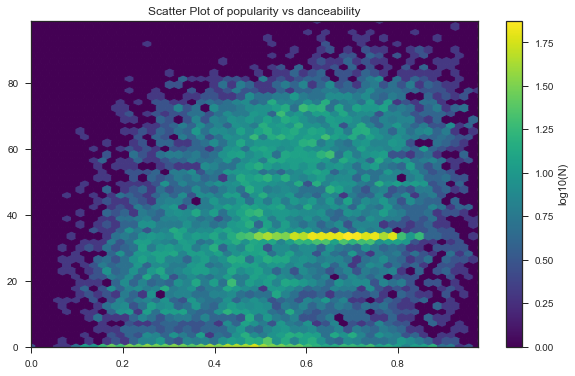

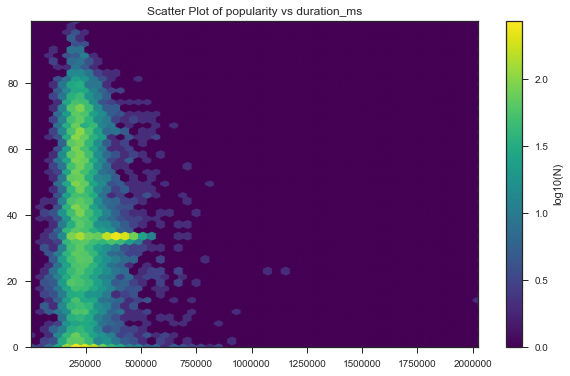

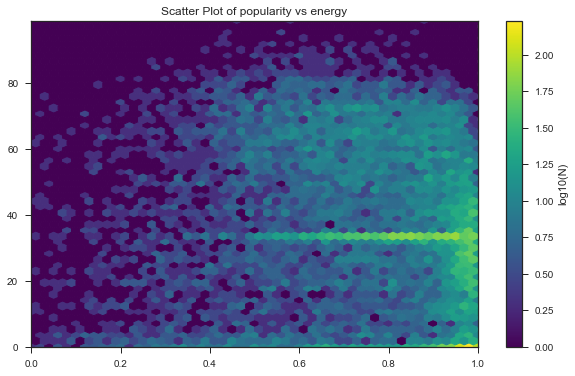

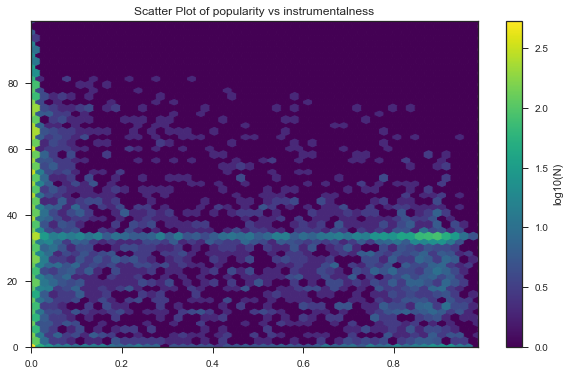

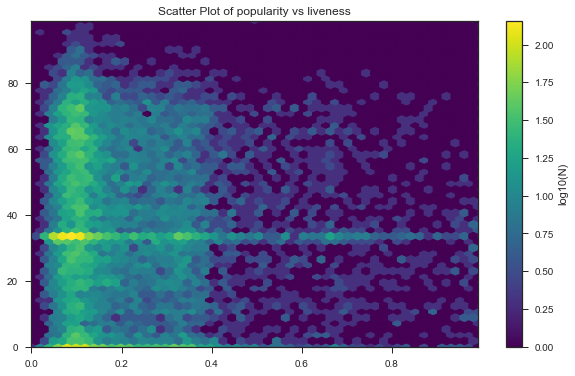

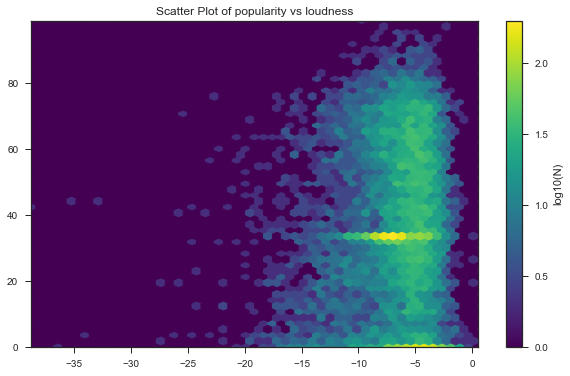

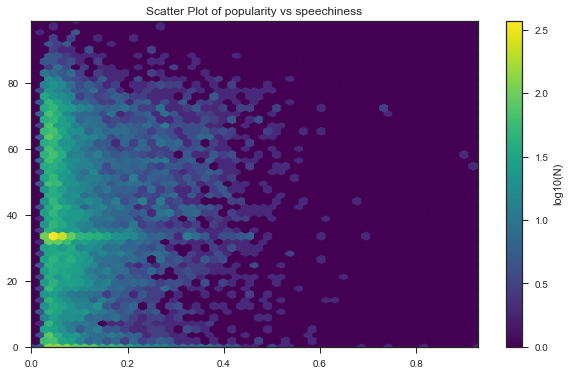

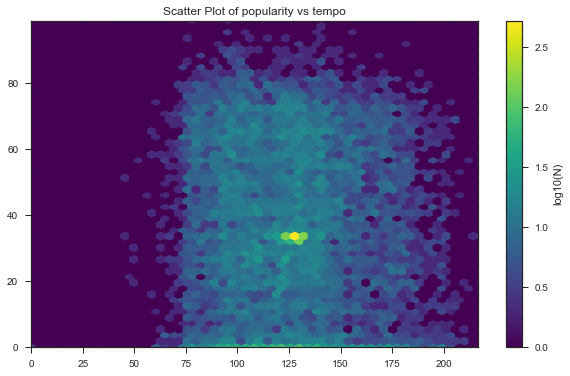

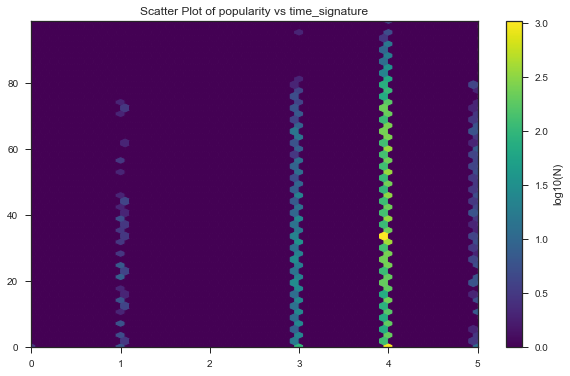

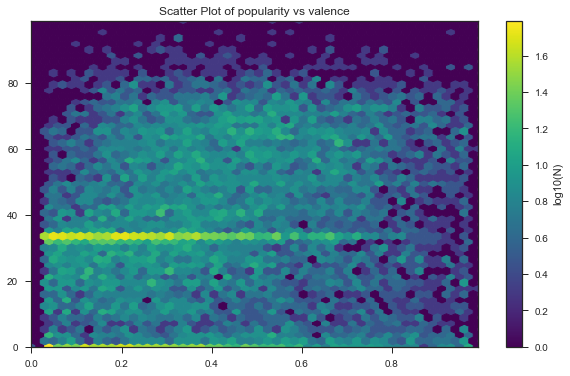

In [119]:
###Creating ScatterPlots for each feature vs popularity
featureList = ['acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness','liveness','loudness', 
        'speechiness', 'tempo', 'time_signature','valence']
for xlabel in featureList:
    heatScatterPlot(xlabel, 'popularity')

In [139]:
###Creating Bar Plot of Counts by Genre
genres = ['blues','country','electric','jazz','metal','pop','rap','rock']
counts = []
for genre in genres:
    counts.append(len(songDf['genre'][songDf['genre'] == genre]))

print(counts)
new = plt.bar(genres, counts, align='center', color = "red")
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Number of Songs by Genre')
plt.savefig('countOfGenre.png')

[535, 514, 997, 483, 3089, 538, 2659, 2416]
